# The Task
- For this assignment, you will be building a machine learning model to predict car price using all of the provided features.
- Specifically, you will:
    - Preprocess the data as dataframes with feature names using the updated column transformer.
    - Fit and evaluate a Tree Based Model of your choice.
        - Evaluate training and test data using R-squared and RMSE.
    - Extract and Plot the Feature Importances calculated by your model.
    - Answer the Qs:
        1) What were your 5 most important features?
        2) What does it mean that they were "important"?
- Apply sklearn's permutation importance and visualize the permutation importances.
- Answer the Qs:
    1) What were your 5 most important features?
    2) Are they the same features that your model has as the top 5 important?

# The Data
- You will be using a modified version of the car price dataset from Kaggle ([Original Source](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)).
- Direct Link: https://docs.google.com/spreadsheets/d/e/2PACX-1vSnWFRczgXa0AyKkbioX5Roq60X7GTAFilKtpFuAmyGi9uPMwdb51Jo-cpupDyjhT0EVqcNRJPINZ5b/pub?output=csv

In [10]:
## Our standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

# ## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))

In [2]:
# Load Data
data = 'Data/CarPrice_Assignment-MODIFIED - CarPrice_Assignment-MODIFIED.csv'
df = pd.read_csv(data)

In [3]:
df.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

# Preprocess the data as dataframes with feature names using the updated column transformer


In [6]:
y = df['price']
X = df.drop(columns='price')

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,...,6,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,0,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,...,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,0,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,...,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,0,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,...,6,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,-1,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,...,4,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [7]:
## make pipeline for categorical
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

## make pipeline for numeric
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

In [8]:
## make the preprocessing column transformer with verbose_feature_names_out=False
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1536501f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1536502e0>)],
                  verbose_feature_names_out=False)

In [11]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
48,0.0,113.0,199.6,69.6,52.8,4066.0,6.0,258.0,3.63,4.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
196,-2.0,104.3,188.8,67.2,56.2,2935.0,4.0,141.0,3.78,3.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
148,0.0,96.9,173.6,65.4,54.9,2420.0,4.0,108.0,3.62,2.64,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,93.1,166.8,64.2,54.1,1945.0,4.0,91.0,3.03,3.15,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,97.2,173.4,65.2,54.7,2324.0,4.0,120.0,3.33,3.47,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Fit and evaluate a Tree Based Model of your choice.

In [12]:
## Evaluate training and test data using R-squared and RMSE. 
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit-learn-compatible regression model using r-squared and RMSE

    Args:
        model (Regressor): Regression Model with a .predict method
        X_train (DataFrame): Training Features
        y_train (Series): Training Target
        X_test (DataFrame): Test Features
        y_test (Series): Test Target
    """

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## XGBoost

In [13]:
import xgboost as xgb


In [14]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_df,y_train)
evaluate_regression(xgb_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 1.00	RMSE= 236.20
Test Data:	R^2= 0.90	RMSE= 2749.60


In [17]:
feature_importance = pd.Series(xgb_reg.feature_importances_, index=feature_names,
                        name='XGBoost Feature Importances')
feature_importance.head()


symboling    0.001401
wheelbase    0.019486
carlength    0.001908
carwidth     0.002352
carheight    0.001233
Name: XGBoost Feature Importances, dtype: float32

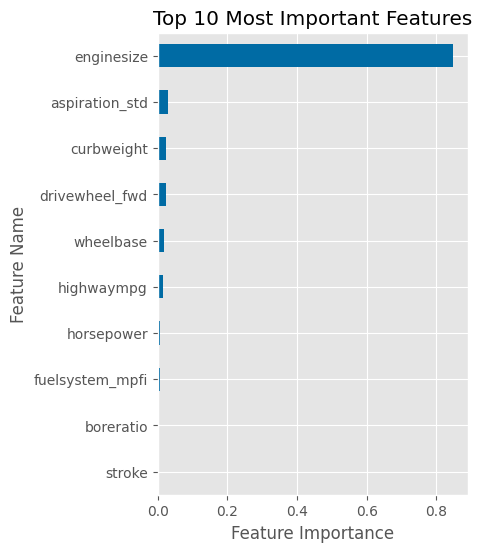

In [18]:
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

- **What were your 5 most important features?**
    - The top 5 most important features are:
        - enginesize
        - aspiration_std
        - curbweight
        - drivewheel_fwd
        - wheelbase

- **What does it mean that they were "important"?**
    - An "important" feature is like a tool the model uses a lot while learning. But just because it's important doesn't mean it always makes things go one way or the other.

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train_df, y_train)
evaluate_regression(dtree, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 1.00	RMSE= 236.17
Test Data:	R^2= 0.86	RMSE= 3321.69


In [24]:
feature_importance = pd.Series(dtree.feature_importances_, index=feature_names,
                        name='Decision Tree Feature Importances')
feature_importance.sort_values(ascending=False).head()

enginesize          0.662868
curbweight          0.230773
compressionratio    0.023411
horsepower          0.013551
highwaympg          0.012891
Name: Decision Tree Feature Importances, dtype: float64

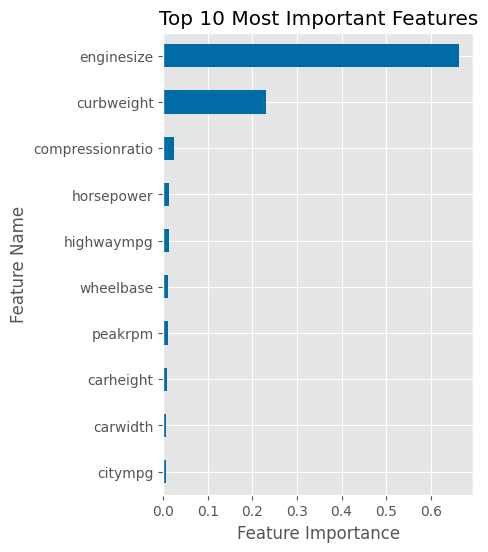

In [23]:
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

- **What were your 5 most important features?**
    - The top 5 most important features are:
        - enginesize
        - curbweight
        - compressionratio
        - horsepower
        - highwaympg

# Apply sklearn's permutation importance and visualize the permutation importances.

In [25]:
from sklearn.inspection import permutation_importance

## XGBoost

In [26]:
r = permutation_importance(xgb_reg, X_train_df, y_train ,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [27]:
## can make the mean importances into a series
perm_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
perm_importances.head()


symboling    0.004123
wheelbase    0.030592
carlength    0.011778
carwidth     0.017780
carheight    0.007909
Name: permutation importance, dtype: float64

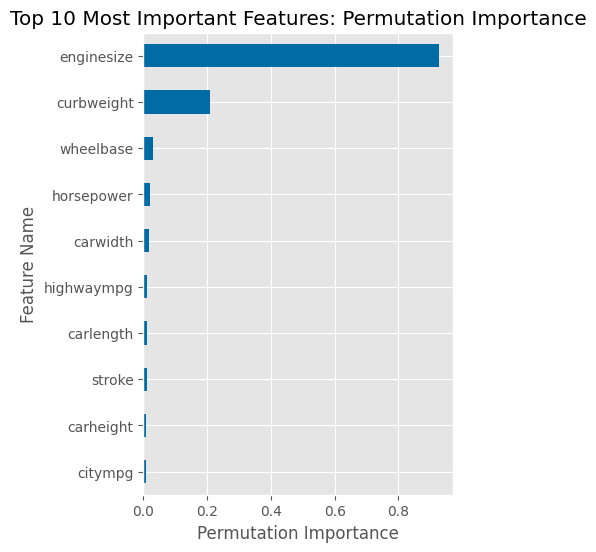

In [28]:
ax = perm_importances.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Permutation Importance',
       title='Top 10 Most Important Features: Permutation Importance');

- **What were your 5 most important features?**
    - enginesize
    - curbweight
    - wheelbase
    - carwidth
    - horsepower

- **Are they the same features that your model has as the top 5 important?** 
    - No, only enginesize, curbweeight, and wheelbase appear in both, but in a different order.

## Decision Tree

In [29]:
r = permutation_importance(dtree, X_train_df, y_train ,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [30]:
## can make the mean importances into a series
perm_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
perm_importances.head()

symboling    0.000490
wheelbase    0.087436
carlength    0.050720
carwidth     0.022995
carheight    0.091143
Name: permutation importance, dtype: float64

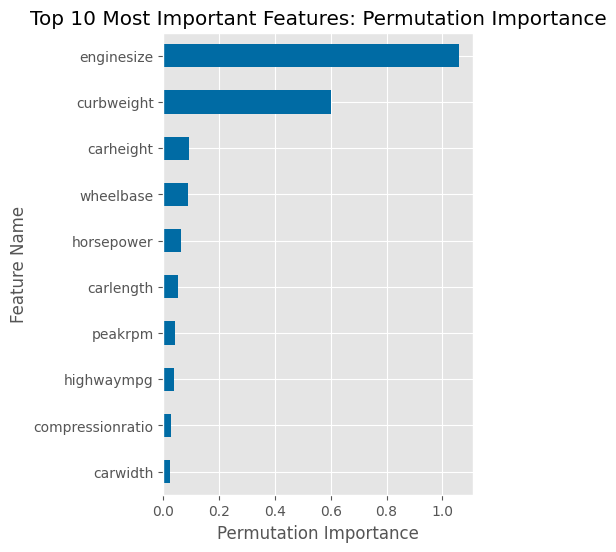

In [31]:
ax = perm_importances.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Permutation Importance',
       title='Top 10 Most Important Features: Permutation Importance');

- **What were your 5 most important features?**
    - enginesize
    - curbweight
    - carheight
    - wheelbase
    - horsepower

- **Are they the same features that your model has as the top 5 important?** 
    - No, only enginesize, curbweeight appear in the same order, while horsepower appears in both, but in a different order.